![uwm_logo1_pl.svg](https://uwm.edu.pl/sites/default/files/2023-01/uwm_logo_poziome_PL.png)

# Symulacje komputerowe
## Laboratorium 02 - Chaos deterministyczny
**mgr inż. Adam Zalewski**<br>
na podstawie materiałów **dra inż. Mariusza Bodziocha**

**Zadanie 0.** Zaimportuj niezbędne biblioteki.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import solve_ivp

### Układ Rosslera

https://pl.wikipedia.org/wiki/Uk%C5%82ad_Rosslera

Układ Rosslera albo odwzorowanie Rosslera to układ trzech sprzężonych nieliniowych równań różniczkowych przedstawionych przez Otto Rosslera w 1976

$$ \left\{\begin{array}{l}
    \frac{dx}{dt} = -y-z\\
    \frac{dy}{dt} = x + ay\\
    \frac{dz}{dt} = b + z(x-c)
    \end{array}\right. $$

Dla odwzorowania przy parametrach $a=0.2$ i $b=0.2$, startując z punktu początkowego na płaszczyźnie układu dochodzi się do zbioru punktów nazywanych dziwnym atraktorem Rosslera.

**Zadanie 1.** Zaimplementuj funkcję <code>def rossler(t, state, a, b, c)</code> dla domyślnych wartości $a=0.2$, $b=0.2$ oraz $c=5.7$, która zwraca tablicę obliczonych pochodnych $\frac{dx}{dt}$, $\frac{dy}{dt}$ oraz $\frac{dz}{dt}$.

In [2]:
def rossler(t, state, a=0.2, b=0.2, c=5.7):
    x,y,z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z*(x-c)
    return [dx, dy, dz]

**Zadanie 2.** Dla $t=0,...,150$ i punkcie początkowym o współrzędnych $(1,1,1)$ wyświetl wykres dla $x$, $y$ oraz $z$ układu Rosslera. Wykorzystaj <code>from scipy.integrate import solve_ivp</code>

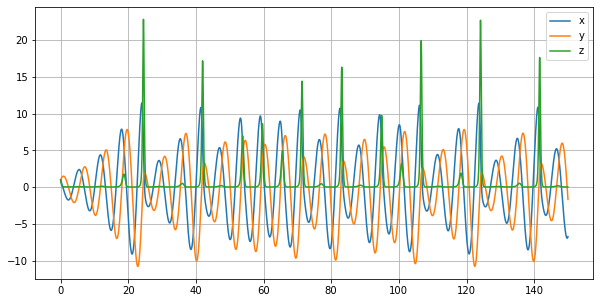

In [3]:
t_span = (0,150)
t_eval = np.linspace(*t_span, 10000)

sol_1 = solve_ivp(rossler, t_span, [1,1,1], args=(0.2,0.2,5.7), t_eval=t_eval)

plt.figure(figsize=(10,5))
plt.plot(sol_1.t, sol_1.y[0], label ="x")
plt.plot(sol_1.t, sol_1.y[1], label ="y")
plt.plot(sol_1.t, sol_1.y[2], label ="z")
plt.legend()
plt.grid()
plt.show()

**Zadanie 3.** Dla $t=0,...,150$ i punkcie początkowym o współrzędnych $(1.001,1.001,1.001)$ wyświetl wykres dla $x$, $y$ oraz $z$ układu Rosslera. Wykorzystaj <code>from scipy.integrate import solve_ivp</code>

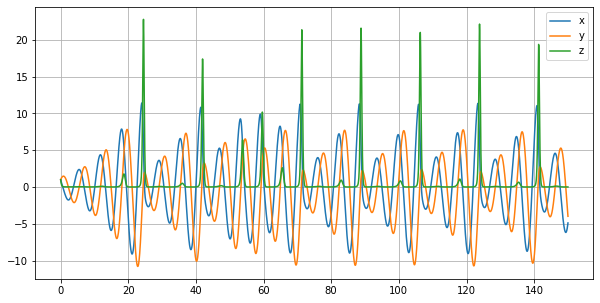

In [4]:
t_span = (0,150)
t_eval = np.linspace(*t_span, 10000)

sol_2 = solve_ivp(rossler, t_span, [1.001,1.001,1.001], args=(0.2,0.2,5.7), t_eval=t_eval)

plt.figure(figsize=(10,5))
plt.plot(sol_2.t, sol_2.y[0], label ="x")
plt.plot(sol_2.t, sol_2.y[1], label ="y")
plt.plot(sol_2.t, sol_2.y[2], label ="z")
plt.legend()
plt.grid()
plt.show()

**Zadanie 4.** Dla rozwiązań z zadań 2 i 3 wyświetl:

**4.1** wykres $x$ względem $t$

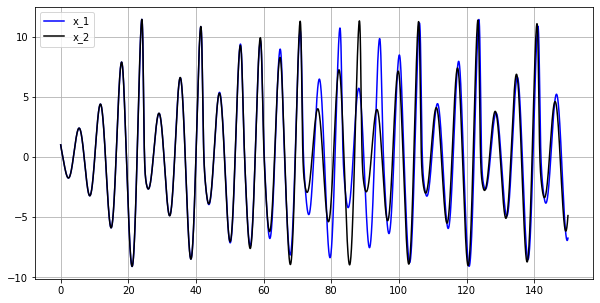

In [5]:
plt.figure(figsize =(10,5))
plt.plot(sol_1.t, sol_1.y[0], label="x_1", color="blue")
plt.plot(sol_2.t, sol_2.y[0], label="x_2", color="black")
plt.legend()
plt.grid()
plt.show()

**4.2** wykres $y$ względem $t$

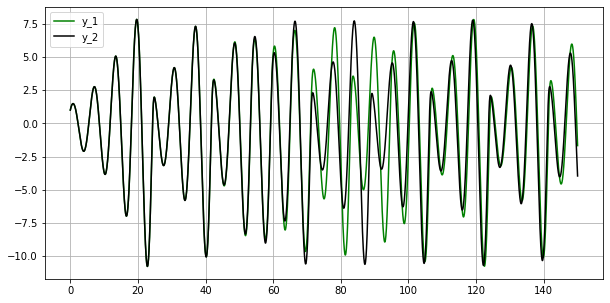

In [6]:
plt.figure(figsize =(10,5))
plt.plot(sol_1.t, sol_1.y[1], label="y_1", color="green")
plt.plot(sol_2.t, sol_2.y[1], label="y_2", color="black")
plt.legend()
plt.grid()
plt.show()

**4.3** wykres $z$ względem $t$

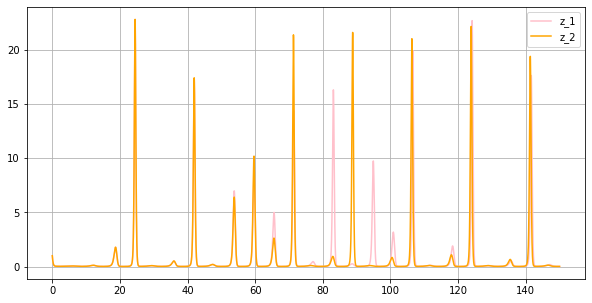

In [7]:
plt.figure(figsize =(10,5))
plt.plot(sol_1.t, sol_1.y[2], label="z_1", color="pink")
plt.plot(sol_2.t, sol_2.y[2], label="z_2", color="orange")
plt.legend()
plt.grid()
plt.show()

**Zadanie 5.** Na płaszczyźnie dwuwymiarowej wygeneruj wykres atraktora układu Rosslera dla rozwiązań z zadań 2 i 3.

**5.1** Wykres dla $(x,y)$

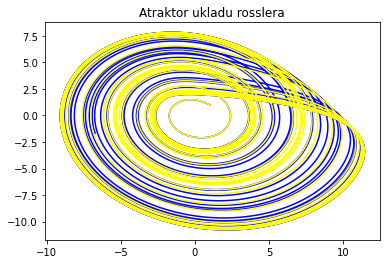

In [8]:
plt.plot(sol_1.y[0], sol_1.y[1], color="blue")
plt.plot(sol_2.y[0], sol_2.y[1], color="yellow")

plt.title("Atraktor ukladu rosslera")
plt.show()

**5.2** Wykres dla $(x,z)$

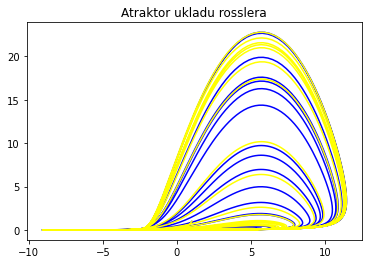

In [9]:
plt.plot(sol_1.y[0], sol_1.y[2], color="blue")
plt.plot(sol_2.y[0], sol_2.y[2], color="yellow")

plt.title("Atraktor ukladu rosslera")
plt.show()

**5.3** Wykres dla $(y,z)$

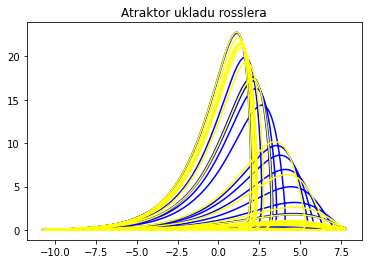

In [10]:
plt.plot(sol_1.y[1], sol_1.y[2], color="blue")
plt.plot(sol_2.y[1], sol_2.y[2], color="yellow")

plt.title("Atraktor ukladu rosslera")
plt.show()

**Zadanie 6.** W przestrzeni trójwymiarowej wygeneruj wykres atraktora układu Rosslera dla rozwiązań z zadań 2 i 3.

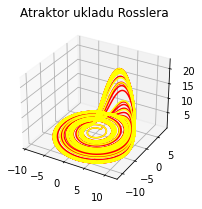

In [11]:
fig = plt.figure(figsize=(3, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(sol_1.y[0], sol_1.y[1], sol_1.y[2], color="red")
ax.plot(sol_2.y[0], sol_2.y[1], sol_2.y[2], color="yellow")

plt.title("Atraktor ukladu Rosslera")
plt.show()

**Zadanie 7.** Dla kolejnych $t$ z zadań 2 i 3 wyświetl wykres wartości $||\delta x(t)||$, $\log{\frac{||\delta x(t)||}{||\delta x(0)||}}$, $\lambda$. Korzystając z <code>np.polyfit()</code> wyznacz $\lambda_{est}$.

lam_est = -0.016


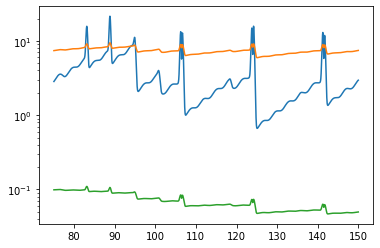

In [12]:
dt = np.linalg.norm((sol_1.y - sol_2.y).T, axis=1)
d0 = dt[0]
logd = np.log(dt / d0)
ly = logd / sol_1.t

start = 5000
end = 10000
lam = np.polyfit(sol_1.t[start:end], logd[start:end], 1)[0]
print(f'lam_est = {lam:.3f}')
plt.semilogy(sol_1.t[start:end], dt[start:end])
plt.semilogy(sol_1.t[start:end], logd[start:end])
plt.semilogy(sol_1.t[start:end], ly[start:end])

plt.show()


### Iteracje logistyczne

**Zadanie 8.** Zaimplementuj funkcję <code>def model(alpha, beta, p0, n)</code> - gdzie $n$ to ilość iteracji - obliczającą kolejne interacje modelu logistycznego danego równaniem:

$$ p_{t+1} = (1+\alpha-\beta p_t)p_t$$

In [13]:
def model(alpha,beta,p0,n):
    p=np.zeros(n+1)
    p[0]=p0
    for t in range(n):
        p[t+1]=(1+ alpha - beta * p[t]) * p[t]
    return p

**Zadanie 9.** Wygenerować wykresy ciągu ($p_t$) dla $t = 0, ..., 100$, $\alpha = 0.3$, $\beta = 0.7$ oraz pięciu losowych
wartości $p_0 \in (0, 1)$.


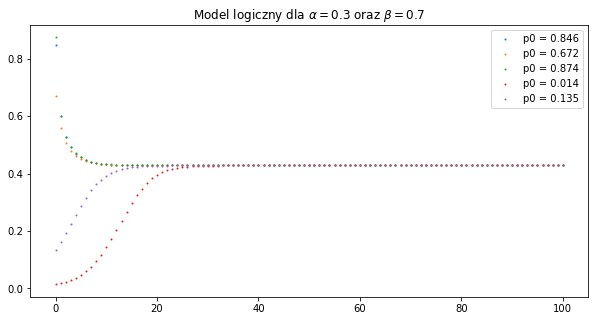

In [14]:
alpha = 0.3
beta = 0.7

n = 100
p0_values = np.random.rand(5)

plt.figure(figsize=(10, 5))

for p0 in p0_values:
    plt.scatter(range(n+1), model(alpha, beta, p0, n), s=1, label=f"p0 = {p0:.3f}")

plt.title(r"Model logiczny dla $\alpha=0.3$ oraz $\beta=0.7$")
plt.legend()
plt.show()


**Zadanie 10.** Napisać funkcję, która obliczy dla którego kroku $t$ wartość $p_t$ różni się od wartości $w$ o mniej niż wartość $c$. Sprawdzić działanie funkcji dla $p_0 = 0.5$, $\alpha = 0.3$, $\beta = 0.7$, $w = 0.4285714285714286$ i $c = 10^{−9}$.

**Zadanie 11.** Wygenerować wykresy ciągu ($p_t$) dla $t = 0, ..., 100$, $\alpha = 2$, $\beta = 3$ oraz pięciu losowych wartości $x_i \in (0, 1)$.

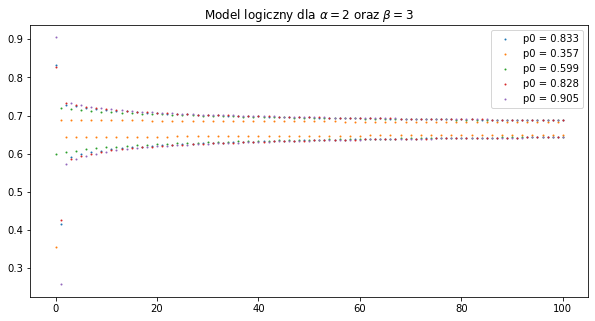

In [15]:
alpha = 2
beta = 3

n = 100
p0_values = np.random.rand(5)

plt.figure(figsize=(10, 5))

for p0 in p0_values:
    plt.scatter(range(n+1), model(alpha, beta, p0, n), s=1, label=f"p0 = {p0:.3f}")

plt.title(r"Model logiczny dla $\alpha=2$ oraz $\beta=3$")
plt.legend()
plt.show()

**Zadanie 12.** Wygenerować wykresy ciągu ($p_t$) dla $t = 0, ..., 10 000$, $\alpha = 2.8$, $\beta=2.3$ oraz dwóch losowych wartości $p_0 \in (0,1)$.

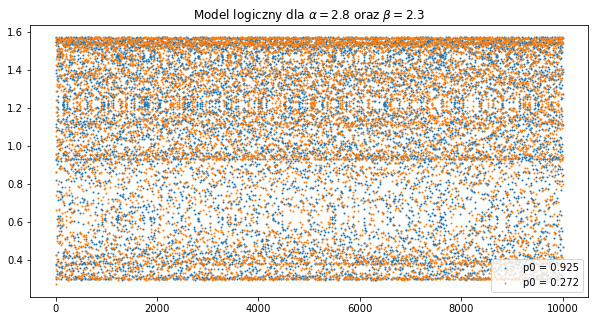

In [16]:
alpha = 2.8
beta = 2.3

n = 10000
p0_values = np.random.rand(2)

plt.figure(figsize=(10, 5))

for p0 in p0_values:
    plt.scatter(range(n+1), model(alpha, beta, p0, n), s=1, label=f"p0 = {p0:.3f}")

plt.title(r"Model logiczny dla $\alpha=2.8$ oraz $\beta=2.3$")
plt.legend()
plt.show()

**Zadanie 13.** Wygenerować wykresy ciągu ($p_t$) dla $t = 0, ..., 10 000$, $\alpha = 2.8$, $\beta=2.3$ oraz dwóch wartości $p_0$ gdzie jedna z nich powstaje w sposób $0.numeralbumu$ (np. numer albumu = 123456 to wartość $p_0=0.123456$), a druga $0.(numeralbumu+1)$ (np. numer albumu = 123456 to wartość $p_0=0.123457$).

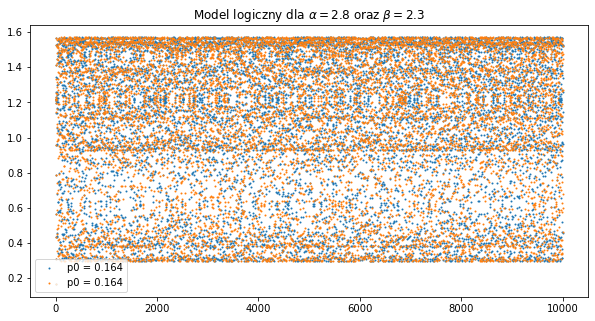

In [17]:
alpha = 2.8
beta = 2.3

n = 10000
p0_values = [0.164421, 0.164422]

plt.figure(figsize=(10, 5))

for p0 in p0_values:
    plt.scatter(range(n+1), model(alpha, beta, p0, n), s=1, label=f"p0 = {p0:.3f}")

plt.title(r"Model logiczny dla $\alpha=2.8$ oraz $\beta=2.3$")
plt.legend()
plt.show()

**Zadanie 14.** Zaimplementuj funkcję <code>def model_2(alpha, beta, p0, n)</code> - gdzie $n$ to ilość iteracji - obliczającą kolejne interacje standardowego modelu logistycznego danego równaniem:

$$ p_{t+1}=p_t+\alpha p_t-\beta p_t^2$$

In [18]:
def model_2(alpha,beta,p0,n):
    p = np.zeros(n+1)
    p[0] = p0
    for t in range(n):
        p[t+1] = p[t] + alpha * p[t] - beta * p[t] ** 2
    return p

**Zadanie 15.** Zbadać rozbierzność obu modeli dla $\alpha=2.8$, $\beta=2.3$ $n=100$ oraz $p_0=0.5$

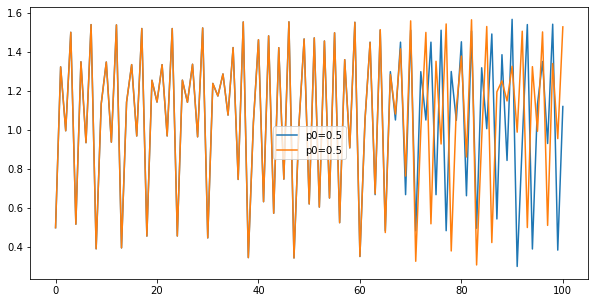

In [21]:
alpha = 2.8
beta = 2.3
n = 100
p0 = 0.5

plt.figure(figsize=(10,5))
plt.plot(range(n+1), model(alpha,beta,p0,n), label=f"p0={p0}")
plt.plot(range(n+1), model_2(alpha,beta,p0,n), label=f"p0={p0}")
plt.legend()
plt.show()

**Zadanie 16.** Napisz funkcję <code>search_difference(model_1, model_2, diff)</code>, która wskaże w której iteracji modele różnią się od siebie o zadaną wartość <code>diff</code> ustawioną domyślnie na $10^{-2}$.

**Zadanie 17.** Wyszukaj dla jakiego $t$ modele różnią się od siebie o $10^{-3}$.

**Zadanie 18.** Wygenerować mapę punktów dla dyskretnego modelu logistycznego dla ustalonego $p_0$, $\beta = 2.3$ oraz $\alpha \in [1.8, 3]$ (zgodnie z opisanym na wykładzie algorytmem)

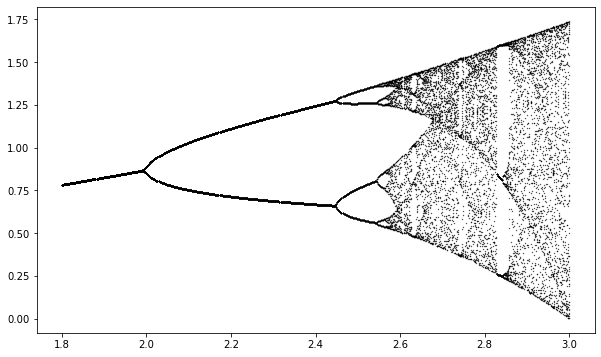

In [31]:
alpha_values = np.linspace(1.8,3, 500)
beta = 2.3
n = 300
n_last = 50
p0 = 0.5

x_points = []
alpha_points = []

for alpha in alpha_values:
    x = model(alpha, beta, p0, n)
    x_points.extend(x[-n_last:])
    alpha_points.extend([alpha]*n_last)

plt.figure(figsize=(10,6))
plt.scatter(alpha_points, x_points, s=0.1, color="black")
plt.show()

**Zadanie 19.** Jak brak odrzucenia początkowych wartości $p_t$ wpływa na mapę punktów? Wykonaj odpowiedni wykres i napisz odpowedź.

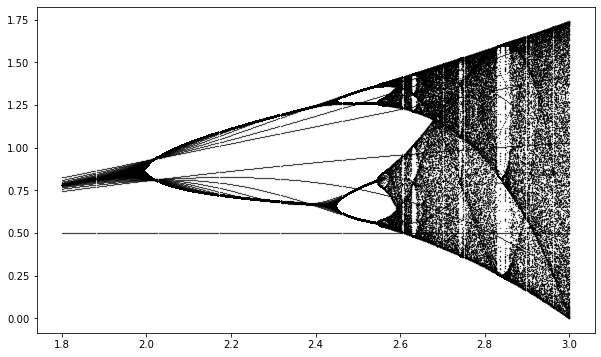

In [36]:
alpha_values = np.linspace(1.8,3, 500)
beta = 2.3
n = 300
p0 = 0.5

x_points = []
alpha_points = []

for alpha in alpha_values:
    x = model(alpha, beta, p0, n)
    x_points.extend(x[:])
    alpha_points.extend([alpha]*(n+1))

plt.figure(figsize=(10,6))
plt.scatter(alpha_points, x_points, s=0.1, color="black")
plt.show()

**Odpowiedź:**

**Zadanie 20.** Czy wybór $p_0$ wpływa na zmianę mapy punktów? Wykonaj odpowiedni wykres i napisz odpowedź.

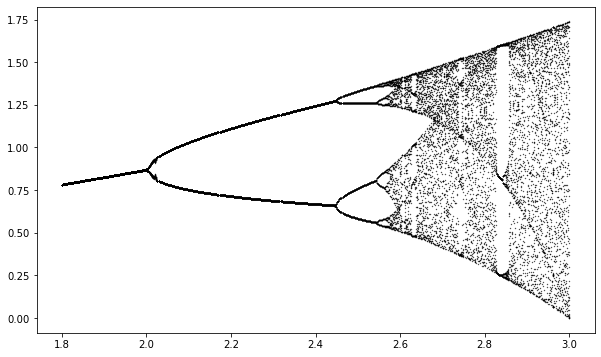

In [34]:
alpha_values = np.linspace(1.8,3, 500)
beta = 2.3
n = 300
n_last = 50
p0 = np.random.rand(3)

x_points = []
alpha_points = []

for p0 in p0_values:
    x_points = []
    alpha_points = []
    
for alpha in alpha_values:
    x = model(alpha, beta, p0, n)
    x_points.extend(x[-n_last:])
    alpha_points.extend([alpha]*n_last)

plt.figure(figsize=(10,6))
plt.scatter(alpha_points, x_points, s=0.1, color="black")
plt.show()

**Odpowiedź:**

#### Wykładnik Lyapunov'a
https://pl.wikipedia.org/wiki/Wyk%C5%82adnik_Lapunowa

**Wykładnik Lyapunov'a** układu dynamicznego – miara, która charakteryzuje tempo separacji infinitezymalnie (nieskończenie) bliskich trajektorii. Pozwala on też ustalić zachowanie się układu dynamicznego dla określonych zmiennych (parametrów). Ogólnie służy do badania układów dynamicznych. Podstawy matematycznej teorii stabilności ruchu stworzył A.M.Lapunow, który rozpatrywał, jak szybko wzrasta w czasie ewolucji odległość pomiędzy dwiema bliskimi trajektoriami. Jeżeli układ dynamiczny jest chaotyczny, odległość taka rośnie w czasie $t$ wykładniczo jak $e^{t\lambda}$, gdzie współczynnik $\lambda$ zwany wykładnikiem Lapunowa jest dodatni. Wykładniki Lapunowa umożliwiają ocenę zjawiska chaotycznego w tzw. przestrzeni fazowej. Przestrzeń fazowa to inny sposób obrazowania wielowymiarowych zjawisk dynamicznych. W zwykłym przebiegu czasowym oś pozioma wykresu obrazuje czas, natomiast oś pionowa odpowiada za stan zjawiska w danej chwili (np. prędkość). W przestrzeni fazowej możemy ocenić wszystkie możliwe stany systemu w każdej chwili czasowej. Trajektoria to obraz wszystkich możliwych stanów, które przyjmuje układ w kolejnych chwilach czasu.

Jeśli przyjąć skończone i odpowiednio małe odcinki czasu, to ewolucję układu dynamicznego można opisać rekurencyjnym równaniem algebraicznym:

$$ x_{n+1}=f(x_{n})$$

gdzie:

$n$ – przyjmuje kolejne wartości całkowite, które można uznać za kolejne interwały czasowe,<br>
$x_n$ – zmienna opisująca stan układu dynamicznego w chwili $n$,<br>
$x_{n+1}$ – to stan układu dynamicznego w chwili $n+1$.

Stan układu w chwili $n+1$ otrzymuje się przez przekształcenie stanu $n$ za pomocą odpowiedniej funkcji $f$. 
Otrzymuje się wówczas ciąg o postaci:

$$ x_{n+1}=f(x_{n})$$

Wykładnik Lapunowa dla dyskretnego systemu jest zdefiniowany w postaci:
$$\lambda\left(x_0\right)=\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=0}^{n-1}\ln\left|\frac{df(x_i)}{dx}\right|$$

Współczynnik ten jest również miarą utraty informacji o układzie w jednym przekształceniu. Mogą zaistnieć trzy możliwości:

$\lambda<0$ – orbita zmierza do stabilnego punktu lub staje się orbitą periodyczną. Ujemny wykładnik Lapunowa charakteryzuje układy dyssypatywne np. tłumione wahadło.<br>
$\lambda=0$ – orbita zmierza do neutralnego, stałego punktu. Wartość ta oznacza, że system znajduje się w najbardziej stabilnym stadium rozwoju.<br>
$\lambda>0$ – orbita jest niestabilna i chaotyczna. Dwa bliskie stany początkowe oddalają się wykładniczo od siebie z upływem czasu.

**Zadanie 21.** Napisz funkcję <code>def derivative_of_logistic(alpha, beta, p)</code> liczącą wartość pochodnej równania logistycznego dla $p$.

In [40]:
def derivative_of_logistic(alpha,beta,p):
    return 1+ alpha - 2 * beta * p

**Zadanie 22.** Napisz funkcję <code>def lyapunov_exponent(alpha, beta, p0, n)</code>, która zwraca tablicę wartości współczynnika Lyapunov'a dla kolejnych wartości $\alpha$.

In [38]:
def lyapunov_exponent(alpha,beta,p0,n):
    p = np.full(n, p0)
    lyap = np.zeros(n)

    for _ in range(n):
        p = (1 + alpha_values - beta*p) * p
        lyap += np.log(np.abs(derivative_of_logistic(alpha,beta,p)))

    return lyap / n

**Zadanie 23.** Dla wartości $\alpha\in\left[1.8,3\right]$, $\beta=2.3$, $p_0=0.5$ oraz $n=500$ wyświetl wykres współczynnika Lyapunov'a. Dodaj przerywaną czerwoną linię dla prostej $y=0$.

(1.0, 3.0)

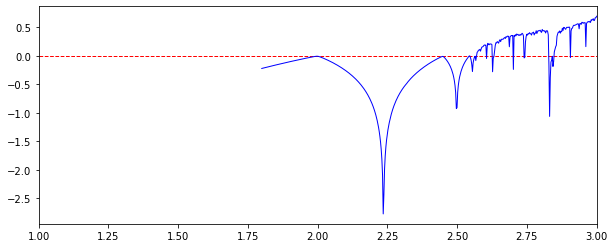

In [41]:
n = 500
alpha_values = np.linspace(1.8, 3, n)
beta = 2.3
p0 = 0.5

lyap_values = lyapunov_exponent(alpha_values, beta, p0, n)
plt.figure(figsize=(10,4))
plt.axhline(0, color="red", linestyle = "dashed", linewidth=1)
plt.plot(alpha_values, lyap_values, "blue", linewidth=1)
plt.xlim(1.0,3)

**Zadanie 24.** Porównaj wykres z zadania 15 oraz wykres z zadania 18. Napisz swoje obserwacje.

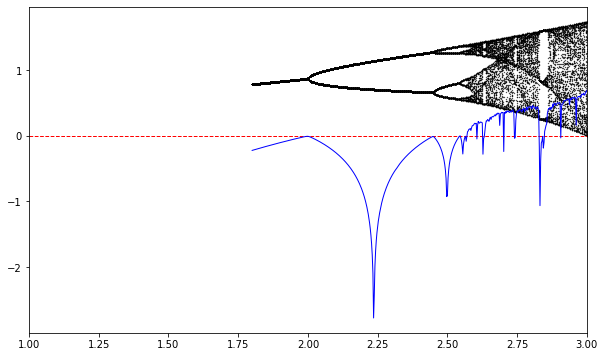

In [43]:
n = 500
alpha_values = np.linspace(1.8,3, n)
beta = 2.3
n_last = 50
p0 = 0.5

x_points = []
alpha_points = []

for alpha in alpha_values:
    x = model(alpha, beta, p0, n)
    x_points.extend(x[-n_last:])
    alpha_points.extend([alpha]*n_last)

plt.figure(figsize=(10,6))
plt.scatter(alpha_points, x_points, s=0.1, color="black")

lyap_values = lyapunov_exponent(alpha_values, beta, p0, n)
plt.axhline(0, color="red", linestyle = "dashed", linewidth=1)
plt.plot(alpha_values, lyap_values, "blue", linewidth=1)
plt.xlim(1.0,3)
plt.show()

**Obserwacje:**

**Zadanie 25.** Zaproponuj swój dyskretny model nieliniowy. Zapisz wzór oraz zaimplementuj jako <code>def model_3(*args)</code>.

Wzór modelu dyskretnego

$$p_{t+1}=\alpha \cdot \sin \frac{p_t}{\beta}$$

**Zadanie 26.** Wygenerować mapę punktów modelu dla ustalonych parametrów (zgodnie z opisanym na wykładzie algorytmem).

**Zadanie 27.** Wykonaj animację 2D .gif atraktora układu Rosslera dla $c\in\left[0,100\right]$.